In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.shape

(9800, 18)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ','_')
)
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
df['ship_date']=pd.to_datetime(df['ship_date'],dayfirst=True)

In [ ]:
df[['order_date', 'ship_date']].head()
df['order_date'].dtype

dtype('<M8[ns]')

In [ ]:
df['sales'] = df['sales'].fillna(df['sales'].median())

In [ ]:
df.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Handle Outliers
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR=Q3-Q1
#Remove outliers
df=df[
(df['sales'] >= Q1-1.5*IQR)&
(df['sales']<= Q3 + 1.5*IQR)
].copy()

In [ ]:
#creating Time Features
df['order_year']=df['order_date'].dt.year
df['order_month']=df['order_date'].dt.month

In [ ]:
df[['order_date','order_year','order_month']].head()

,order_date,order_year,order_month
0,2017-11-08,2017,11
2,2017-06-12,2017,6
4,2016-10-11,2016,10
5,2015-06-09,2015,6
6,2015-06-09,2015,6


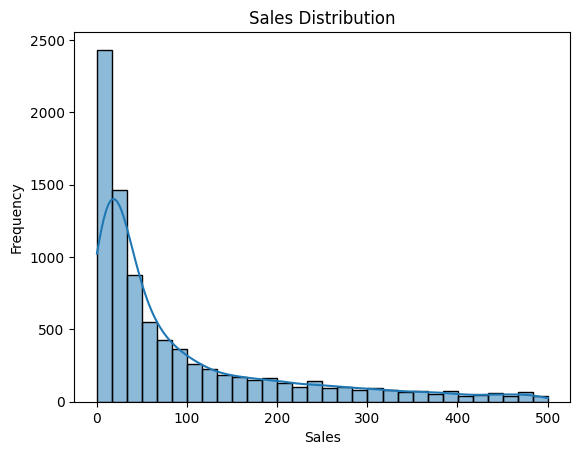

In [ ]:
#Sales distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['sales'],bins=30,kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

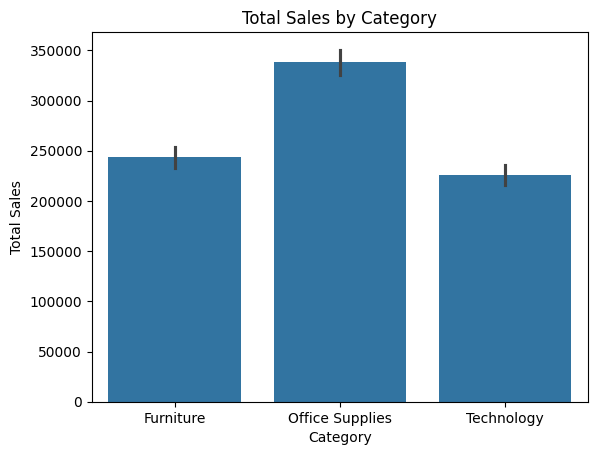

In [ ]:
#Category-wise total sales
sns.barplot(data=df,x='category',y='sales',estimator=sum)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
#sub-category Analysis
subcat_sales=(
    df.groupby('sub-category')['sales']
    .sum()
    .sort_values(ascending=False)
)

subcat_sales.head(10)

,sales
sub-category,
Phones,116360.0900
Storage,93655.4840
Accessories,91726.9400
Chairs,91544.5390
Paper,74207.0540
Furnishings,67580.5060
Binders,59452.1830
Appliances,46720.7290
Tables,44075.8235


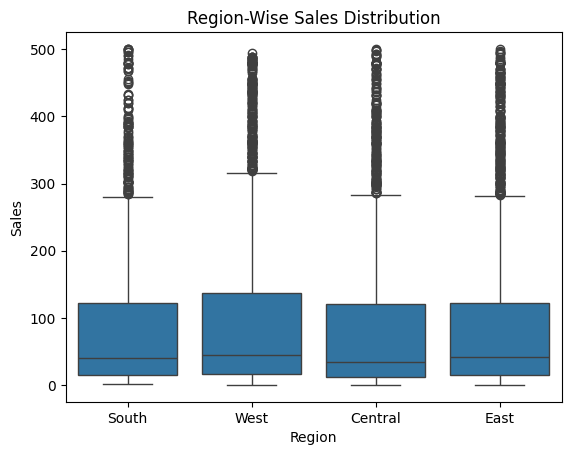

In [ ]:
#region-wise sales distribution
sns.boxplot(data=df,x='region',y='sales')
plt.title("Region-Wise Sales Distribution")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

In [ ]:
df[['order_date','order_year','order_month']].head()

,order_date,order_year,order_month
0,2017-11-08,2017,11
2,2017-06-12,2017,6
4,2016-10-11,2016,10
5,2015-06-09,2015,6
6,2015-06-09,2015,6


In [ ]:
monthly_sales = (
    df.groupby(['order_year', 'order_month'])['sales']
    .sum()
    .reset_index()
)

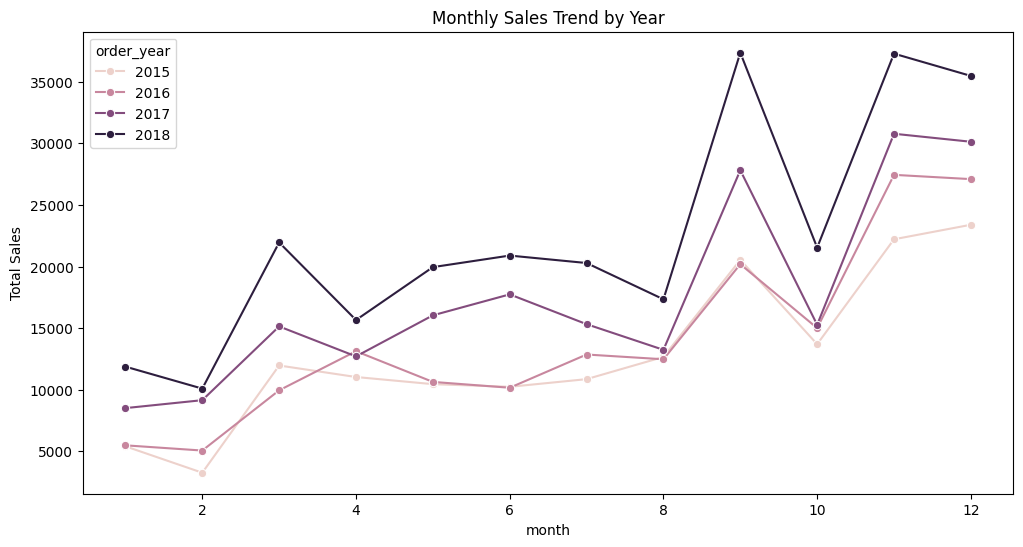

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_sales,
    x='order_month',
    y='sales',
    hue='order_year',
    marker='o'
)
plt.title("Monthly Sales Trend by Year")
plt.xlabel("month")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
import sqlite3
conn=sqlite3.connect("sales.db")

In [ ]:
df.to_sql("sales_data",conn,if_exists="replace",index=False)

8655

In [ ]:
pd.read_sql("SELECT * FROM sales_data LIMIT 5;",conn)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,order_year,order_month
0,1,CA-2017-152156,2017-11-08 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2017,11
1,3,CA-2017-138688,2017-06-12 00:00:00,2017-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2017,6
2,5,US-2016-108966,2016-10-11 00:00:00,2016-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2016,10
3,6,CA-2015-115812,2015-06-09 00:00:00,2015-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,2015,6
4,7,CA-2015-115812,2015-06-09 00:00:00,2015-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,2015,6


In [ ]:
#Total Sales by Category query
query="""
SELECT category, SUM(sales) AS total_sales
FROM sales_data
GROUP BY category
ORDER BY total_sales DESC;
"""
pd.read_sql(query,conn)

,category,total_sales
0,Office Supplies,337978.7500
1,Furniture,243370.4348
2,Technology,225412.1850


In [ ]:
query="""
SELECT city, SUM(sales) AS city_sales
FROM sales_data
GROUP BY city
ORDER BY city_sales DESC
LIMIT 10;
"""
pd.read_sql(query,conn)

,city,city_sales
0,New York City,74163.3690
1,Los Angeles,65624.4345
2,Philadelphia,41367.1880
3,San Francisco,36881.9120
4,Seattle,34781.1880
5,Houston,25277.5336
6,Columbus,20296.9550
7,Chicago,19995.5890
8,Detroit,14697.8820
9,San Diego,14444.3680


In [ ]:
#monthly sales query
query="""
SELECT strftime('%Y- %m', order_date) AS month, SUM(sales) AS total_sales
FROM sales_data
GROUP BY month
ORDER BY month
LIMIT 20;
"""
pd.read_sql(query,conn)

,month,total_sales
0,2015- 01,5406.9670
1,2015- 02,3263.6720
2,2015- 03,11967.3240
3,2015- 04,11032.7010
4,2015- 05,10452.7310
5,2015- 06,10238.1566
6,2015- 07,10859.4270
7,2015- 08,12662.9305
8,2015- 09,20542.6848
9,2015- 10,13696.0970


In [ ]:
df.to_csv("cleaned_superstore.csv",index=False)

In [ ]:
plt.savefig("final_plot.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>